## $\color{SkyBlue}{\text{Head Coach Age Analysis}}$
#### $\color{SkyBlue}{\text{Roman Lynch}}$

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

$\rule{27cm}{0.4pt}$
### K-Means Algorithm

In [11]:
#--------------------------------------------------------------------------------#
def dist(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)
#--------------------------------------------------------------------------------#

In [12]:
#--------------------------------------------------------------------------------#
def kMeans(df, k, tol=0.0005): 
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #---------------------------------------#
    #-- Initialize --#
    clusters = np.zeros(len(df))

    #-- k-means ++ --#
    centroids = []
    for i in range(k):
        # To intialize the centroids, we pick k datapoints (reliviley) evenly spaced from 
        # one another by Rank (due to rounding) #
        data_point_rank_k = df[df['Rank'] == np.round((i+1)*(15/k), 0)]
        centroids.append(data_point_rank_k.values[0])
    centroids = np.vstack(centroids)
    print(centroids)
    #----------------#
    
    mean_error = np.inf
    converged = False
    
    num_iterations = 0
    
    #---------------------------------------#
    #-- LOOP UNTIL CONVERGENCE --#
    while not(converged):
        
        #-- Cluster Assignment --#
        for index, data in enumerate(df.values):
            distances = [dist(data, centroid) for centroid in centroids]
            clusters[index] = np.argmin(distances)
        
        #-- Update Centroids --#
        updated_centroids = np.empty((k, df.shape[1]))
        for index in range(k):
            clust_data = df[clusters == index]
            centroid = clust_data.mean(axis=0)
            updated_centroids[index, :] = centroid
            
        #-- Calculate Meanerror --#
        errors = []
        for data, cluster in zip(df.values, clusters):
            centroid = updated_centroids[int(cluster)]
            errors.append(dist(data, centroid)**2)
        
        error_arr = np.array(errors)
        
        #-- Calculate Reconstruction Error --#
        rec_err = np.sum(error_arr)/len(df)
        
        #-- Check for Convergence --#
        if (abs(rec_err - mean_error) < tol):
            converged = True
#             print('Converged at iteration {} with a change of {}'.format(num_iterations, abs(rec_err - mean_error)))
        
        # Update Values
        centroids = updated_centroids
        mean_error = rec_err
        num_iterations = num_iterations + 1
        
    #---------------------------------------#
    return centroids, clusters, mean_error
#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Dataframe Composition

In [13]:
#--------------------------------------------------------------------------------#
# Creating the master data frame

## Read in CSV files
df_rankings = pd.read_csv("data/rankings.csv")
df_teams = pd.read_csv("data/team.csv")
df_team_details = pd.read_csv("data/team_details.csv")

## Only take important columns
df_rankings = df_rankings[['Team', 'Rank', 'Year']]
df_teams = df_teams[['full_name', 'abbreviation']]
df_team_details = df_team_details[['abbreviation', 'headcoach_age']]

## Clean "*" from all teams in df_rankings
for i in range(len(df_rankings)):
    if (df_rankings["Team"].iloc[i].find('*')):
        df_rankings["Team"].iloc[i] = df_rankings["Team"].iloc[i].replace('*', '')

## Create the master dataframe by including year_founded, city, team, and rank
df_master = pd.merge(df_rankings,df_teams, left_on="Team", right_on="full_name")
df_master = pd.merge(df_master,df_team_details, left_on="abbreviation", right_on ="abbreviation")
#--------------------------------------------------------------------------------#

print(df_master.head(5))

                    Team  Rank  Year              full_name abbreviation  \
0         Denver Nuggets     1  2023         Denver Nuggets          DEN   
1      Memphis Grizzlies     2  2023      Memphis Grizzlies          MEM   
2       Sacramento Kings     3  2023       Sacramento Kings          SAC   
3           Phoenix Suns     4  2023           Phoenix Suns          PHX   
4  Golden State Warriors     5  2023  Golden State Warriors          GSW   

   headcoach_age  
0             52  
1             39  
2             54  
3             50  
4             58  


In [14]:
#--------------------------------------------------------------------------------#
# Break the data up by year
df_16 = df_master[df_master["Year"] == 2016]
df_17 = df_master[df_master["Year"] == 2017]
df_18 = df_master[df_master["Year"] == 2018]
df_19 = df_master[df_master["Year"] == 2019]
df_20 = df_master[df_master["Year"] == 2020]
df_21 = df_master[df_master["Year"] == 2021]
df_22 = df_master[df_master["Year"] == 2022]
df_23 = df_master[df_master["Year"] == 2023]

print(df_16.shape[0])
print(df_17.shape[0])
print(df_18.shape[0])
print(df_19.shape[0])
print(df_20.shape[0])
print(df_21.shape[0])
print(df_22.shape[0])
print(df_23.shape[0])
#--------------------------------------------------------------------------------#

30
30
30
30
30
30
30
30


$\rule{27cm}{0.4pt}$ 
### Find optimal k value using 2020

[[15 58]]
[[15 58]]
[[15 58]]
[[15 58]]
[[15 58]]
[[15 58]]
[[15 58]]
[[15 58]]
[[15 58]]
[[15 58]]
[[ 8 39]
 [15 58]]
[[ 8 39]
 [15 58]]
[[ 8 39]
 [15 58]]
[[ 8 39]
 [15 58]]
[[ 8 39]
 [15 58]]
[[ 8 39]
 [15 58]]
[[ 8 39]
 [15 58]]
[[ 8 39]
 [15 58]]
[[ 8 39]
 [15 58]]
[[ 8 39]
 [15 58]]
[[ 5 46]
 [10 42]
 [15 58]]
[[ 5 46]
 [10 42]
 [15 58]]
[[ 5 46]
 [10 42]
 [15 58]]
[[ 5 46]
 [10 42]
 [15 58]]
[[ 5 46]
 [10 42]
 [15 58]]
[[ 5 46]
 [10 42]
 [15 58]]
[[ 5 46]
 [10 42]
 [15 58]]
[[ 5 46]
 [10 42]
 [15 58]]
[[ 5 46]
 [10 42]
 [15 58]]
[[ 5 46]
 [10 42]
 [15 58]]
[[ 4 36]
 [ 8 39]
 [11 54]
 [15 58]]
[[ 4 36]
 [ 8 39]
 [11 54]
 [15 58]]
[[ 4 36]
 [ 8 39]
 [11 54]
 [15 58]]
[[ 4 36]
 [ 8 39]
 [11 54]
 [15 58]]
[[ 4 36]
 [ 8 39]
 [11 54]
 [15 58]]
[[ 4 36]
 [ 8 39]
 [11 54]
 [15 58]]
[[ 4 36]
 [ 8 39]
 [11 54]
 [15 58]]
[[ 4 36]
 [ 8 39]
 [11 54]
 [15 58]]
[[ 4 36]
 [ 8 39]
 [11 54]
 [15 58]]
[[ 4 36]
 [ 8 39]
 [11 54]
 [15 58]]
[[ 3 52]
 [ 6 39]
 [ 9 47]
 [12 75]
 [15 58]]
[[ 3 52]
 [ 6 

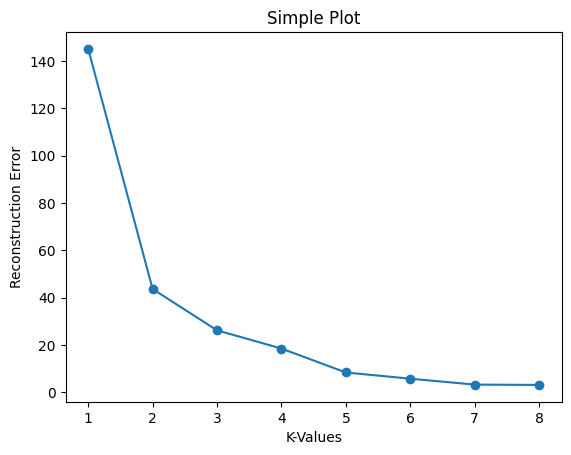

In [15]:
k_values = [1,2,3,4,5,6,7,8]
min_recon_errors_per_k = []

# For all k-values, run k-means 10 times, keeping track of the minimum error found for
# each value of k
##################################################################################
for k in k_values:
    recon_errors = []
    for _ in range(10):
        centroids, clusters, reconstruction_error = kMeans(df_20[["Rank", "headcoach_age"]], k)
        
        recon_errors.append(reconstruction_error)
        
    min_recon_errors_per_k.append(np.min(recon_errors))
##################################################################################

# Plotting the data
plt.plot(k_values, min_recon_errors_per_k, marker='o')

plt.xlabel('K-Values')
plt.ylabel('Reconstruction Error')
plt.title('Simple Plot')

plt.show()

So, as we can see from the above elbow plot, k = 3 is an appropriate k-value to optimize run time while minimizing error

$\rule{27cm}{0.4pt}$ 
### Perform K-means with k = 3

In [18]:
#--------------------------------------------------------------------------------#
## Use k-Means for clustering withk = 3
centroids_23, clusters_23, mean_error_23 = kMeans(df_23[["Rank", "headcoach_age"]], k=3)
centroids_22, clusters_22, mean_error_22 = kMeans(df_22[["Rank", "headcoach_age"]], k=3)
centroids_21, clusters_21, mean_error_21 = kMeans(df_21[["Rank", "headcoach_age"]], k=3)
centroids_20, clusters_20, mean_error_20 = kMeans(df_20[["Rank", "headcoach_age"]], k=3)
centroids_19, clusters_19, mean_error_19 = kMeans(df_19[["Rank", "headcoach_age"]], k=3)
centroids_18, clusters_18, mean_error_18 = kMeans(df_18[["Rank", "headcoach_age"]], k=3)
centroids_17, clusters_17, mean_error_17 = kMeans(df_17[["Rank", "headcoach_age"]], k=3)
centroids_16, clusters_16, mean_error_16 = kMeans(df_16[["Rank", "headcoach_age"]], k=3)
#--------------------------------------------------------------------------------#

[[ 5 58]
 [10 39]
 [15 46]]
[[ 5 36]
 [10 75]
 [15 46]]
[[ 5 50]
 [10 58]
 [15 46]]
[[ 5 46]
 [10 42]
 [15 58]]
[[ 5 36]
 [10 50]
 [15 50]]
[[ 5 42]
 [10 46]
 [15 50]]
[[ 5 46]
 [10 42]
 [15 50]]
[[ 5 47]
 [10 52]
 [15 50]]


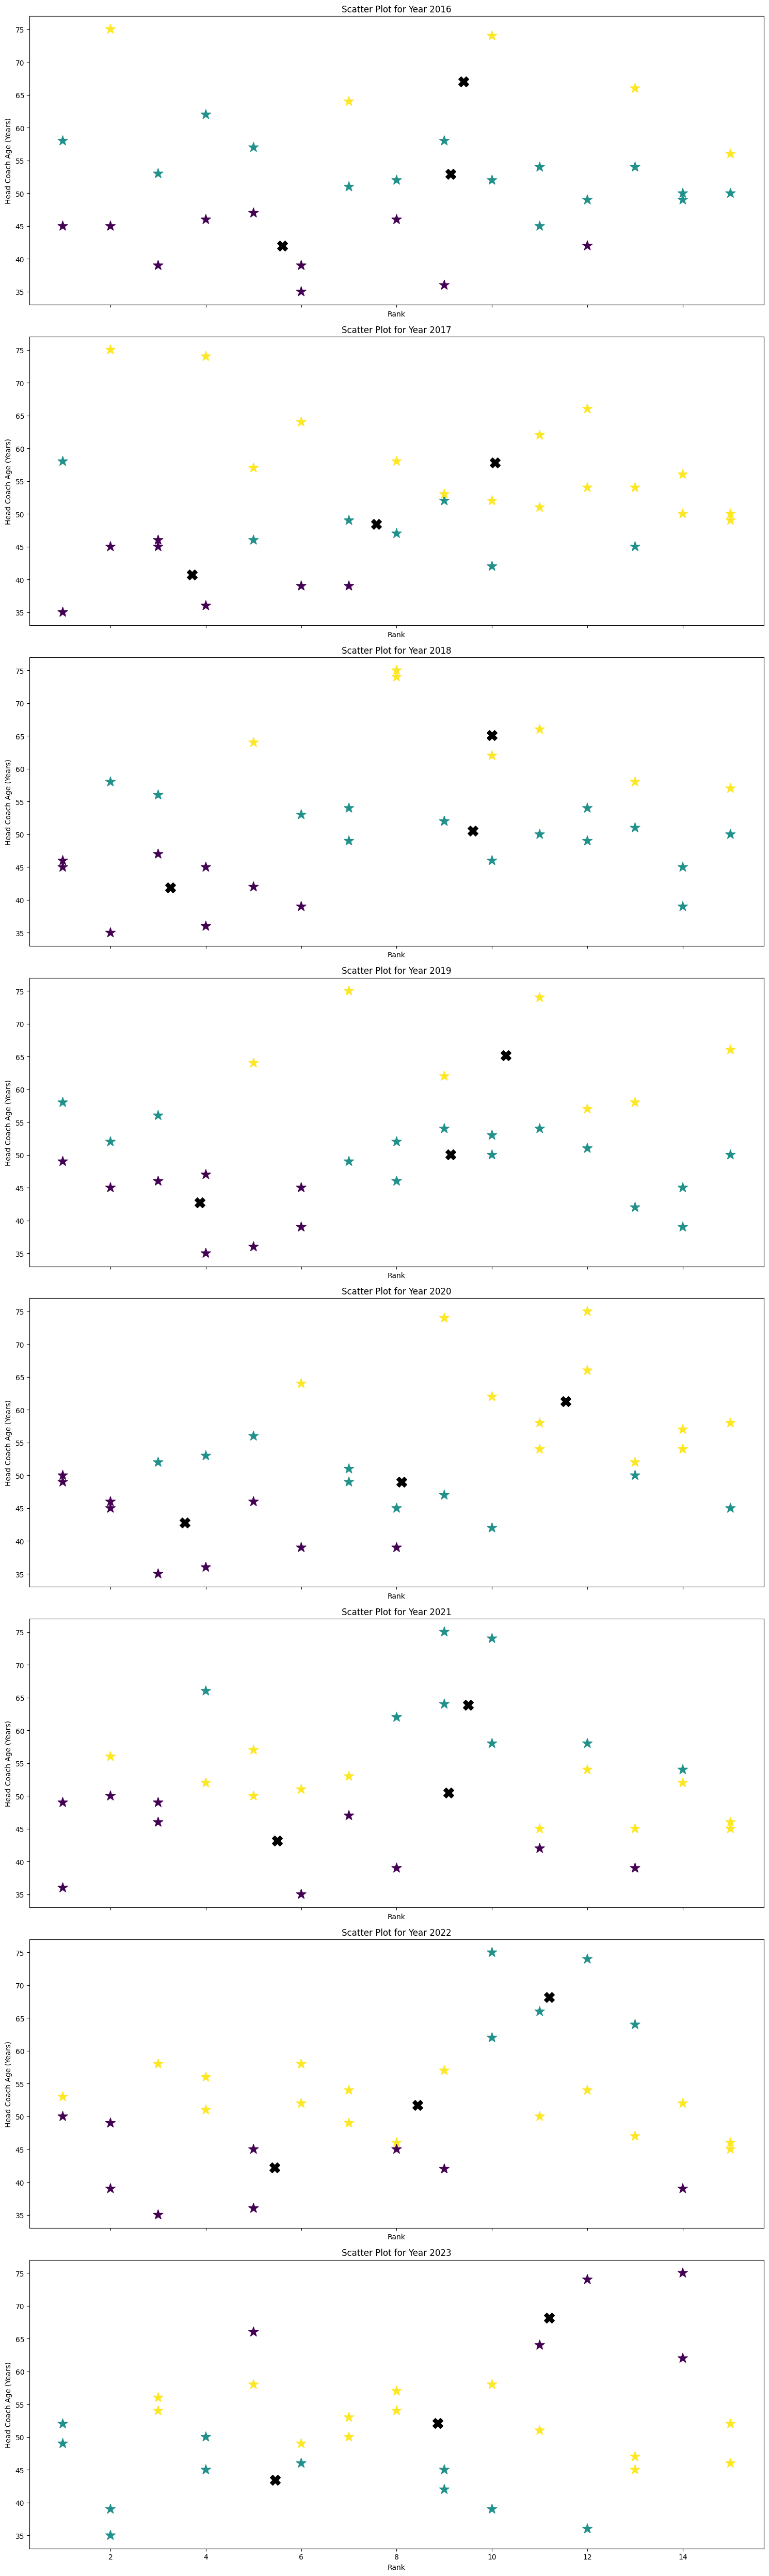

In [22]:
#--------------------------------------------------------------------------------#
# Organize output
dataframes = [df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23]
clusters = [clusters_16, clusters_17, clusters_18, clusters_19, clusters_20, clusters_21, clusters_22, clusters_23]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
centroids = [centroids_16, centroids_17, centroids_18,centroids_19,centroids_20, centroids_21, centroids_22, centroids_23]
#--------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------#
# Plot the data

## Initialize Plot
fig, axes = plt.subplots(8, 1, figsize=(15, 50), sharex=True)

## Loop: Scatter Plot for each Year
for i, (year, dataframe, cluster) in enumerate(zip(years, dataframes, clusters)):
    ax = axes[i]
    ax.scatter(dataframe['Rank'], dataframe['headcoach_age'], c=cluster, marker='*', s=200)
    ax.set_xlabel("Rank")
    ax.set_ylabel("Head Coach Age (Years)")
    ax.set_title("Scatter Plot for Year " + str(year))
    ## Plot centroids
    ax.scatter(centroids[i][:, 0], centroids[i][:, 1], marker='X', s=200, c='black')

plt.tight_layout()
plt.show()

plt.show()
#--------------------------------------------------------------------------------#